In [87]:
import numpy as np
import pandas as pd

In [88]:
df=pd.read_csv('customer_churn_large_dataset.csv')

In [89]:
#import the required libraries
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df.shape

(100000, 9)

In [91]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [92]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [93]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### **Here we can see that 75% people who are not likely to churn are :**
- People who are younger than age 57
- Use lesser than 387 GB
- Has subscription for less than 19 months
- Monthly bill less than 82.64 units

### **The remaining 25% people who are most likely to churn are :**
- People who are older than age 57
- Use more than 387 GB
- Has subscription for more than 19 months
- Monthly bill more than 82.64 units

In [94]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


### **All columns are int64 and object datatypes**

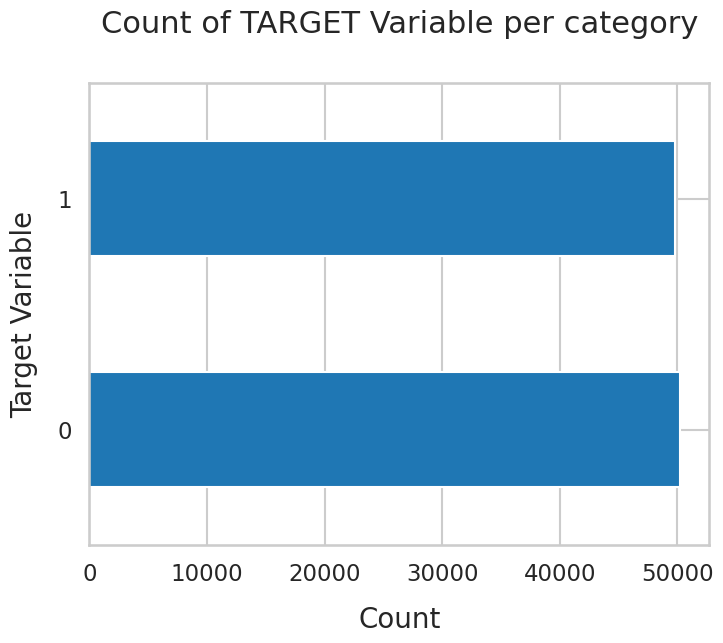

In [95]:
#Checking the distribution of the target variable
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [96]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [97]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

### **Hence our data is balanced**

In [98]:
#Data cleaning
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### **No missing values, let us drop CustomerID and Name as they are irrelevant**

In [99]:
df_final = df.drop(['CustomerID','Name'],axis=1)

In [100]:
#list of categoriacal variables
categorical_features=[feature for feature in df_final.columns if df_final[feature].dtypes == 'O' and  len(df[feature].unique())<25]

print("Categorical Variables Count: {}".format(len(categorical_features)))
categorical_features

Categorical Variables Count: 2


['Gender', 'Location']

### **Univariate Analysis**

<Figure size 640x480 with 0 Axes>

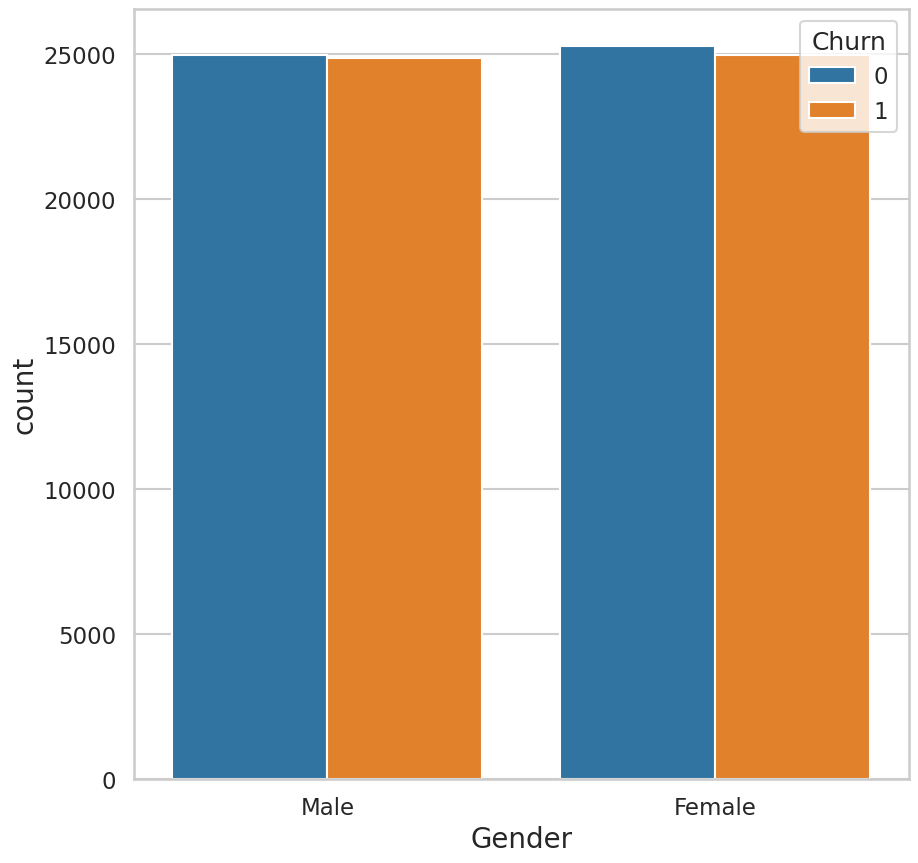

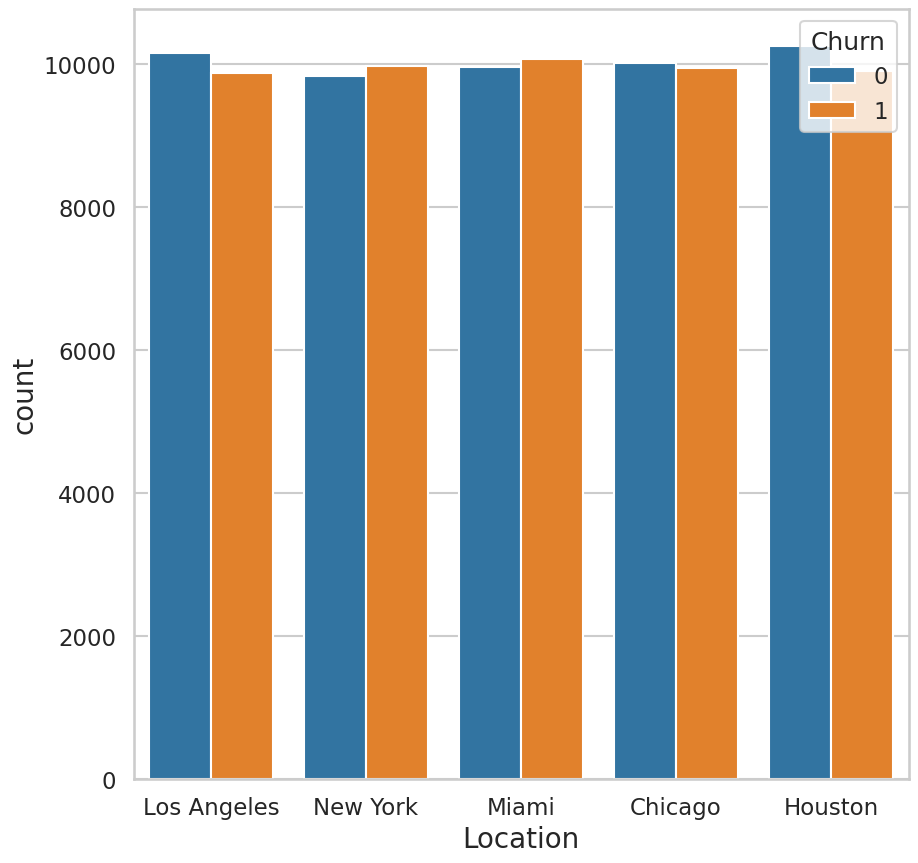

In [101]:
for i, predictor in enumerate(df_final[categorical_features]):
    plt.figure(i)
    plt.figure(figsize=(10,10 ))
    sns.countplot(data=df_final, x=predictor, hue ='Churn')

**The categorical values are evenly distributed**

In [102]:
# list of numerical variables
numerical_features = [feature for feature in df_final.columns if df_final[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  5


['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [103]:
df_final[numerical_features].head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


In [104]:
##Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df_final[feature].unique())<20 and feature != 'Churn']
print("Discrete Variables Count: {}".format(len(discrete_feature)))

continuous_feature=[feature for feature in numerical_features if len(df_final[feature].unique())>20 and feature != 'Churn']
print("Continous Variables Count: {}".format(len(continuous_feature)))
continuous_feature

Discrete Variables Count: 0
Continous Variables Count: 4


['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

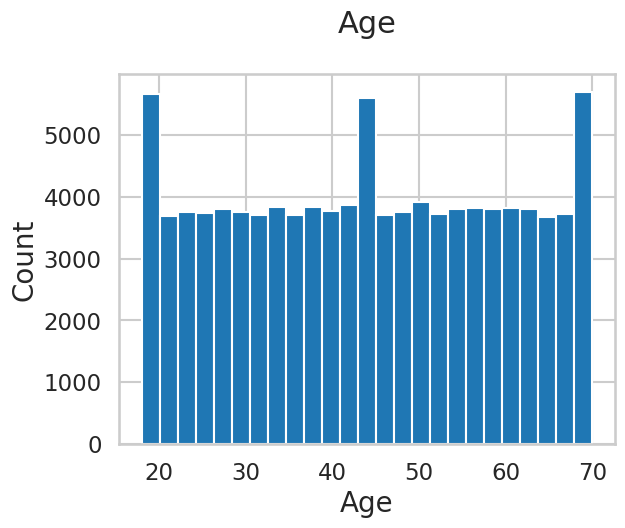

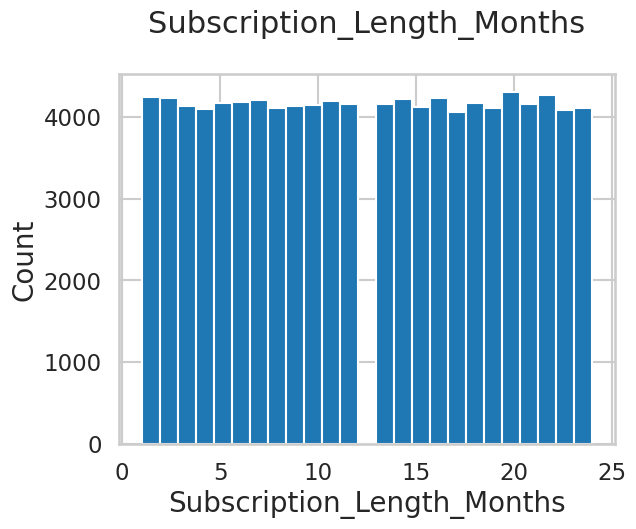

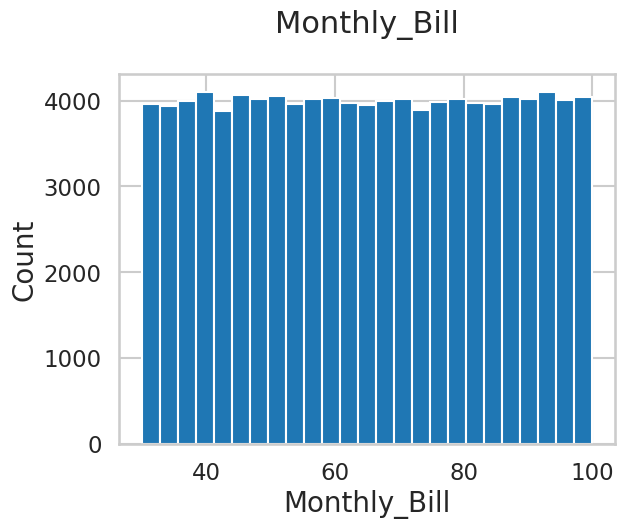

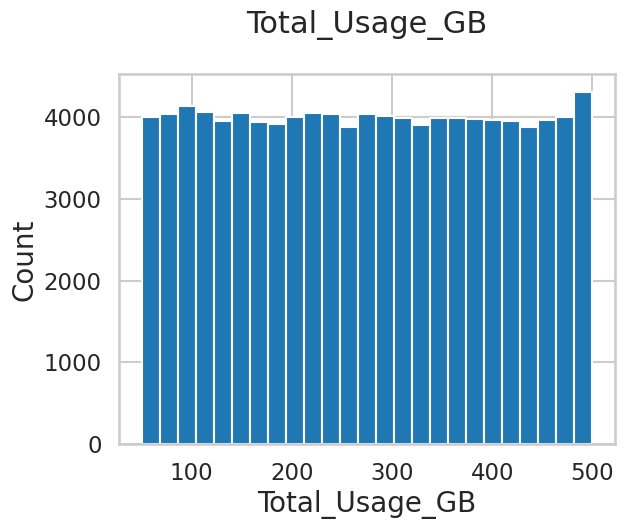

In [105]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df_final.copy()
    df_final[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### **Encoding categorical data**

In [106]:
data=df_final.copy()
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['Churn'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

    data[feature]=data[feature].map(labels_ordered)

In [107]:
labels_ordered

{'Houston': 0, 'Los Angeles': 1, 'Chicago': 2, 'Miami': 3, 'New York': 4}

In [108]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,1,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,1,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,0,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,2,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


### **Building correlation for all predictors**

<Axes: >

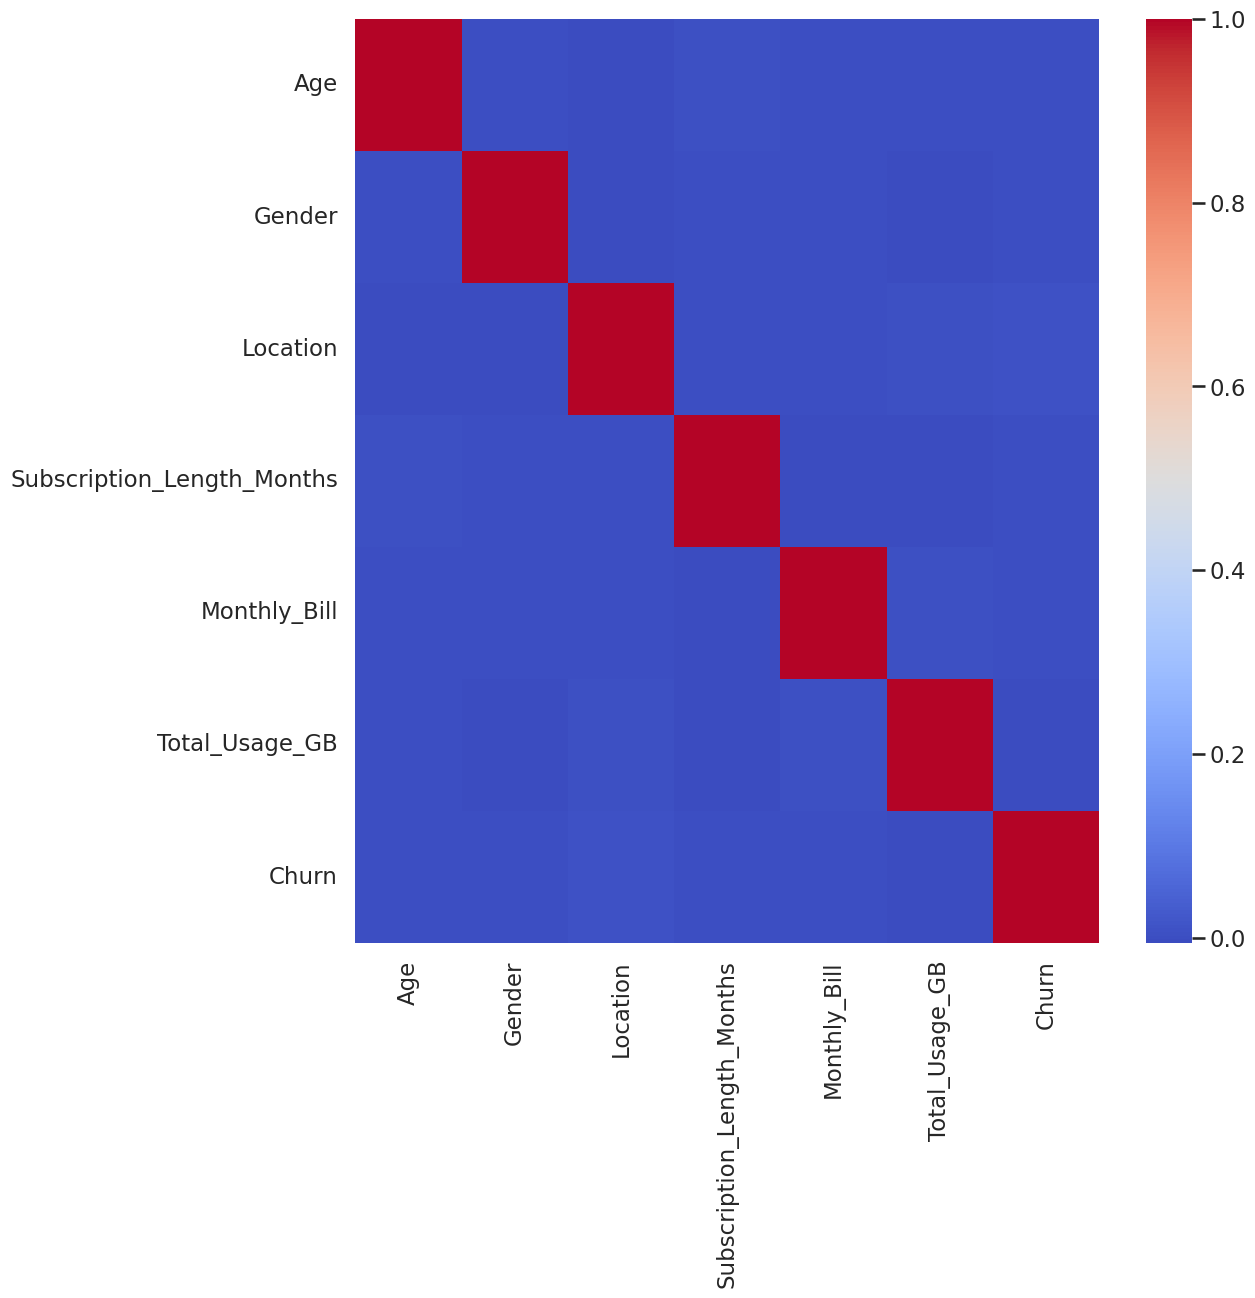

In [109]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="coolwarm")

We don't see any particular correlation between the parameters

### **Bivariate Analysis**

In [110]:
df_target0=df_final.loc[df_final["Churn"]==0]
df_target1=df_final.loc[df_final["Churn"]==1]

In [111]:
def uniplot(df,col,title,hue="coolwarm"):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

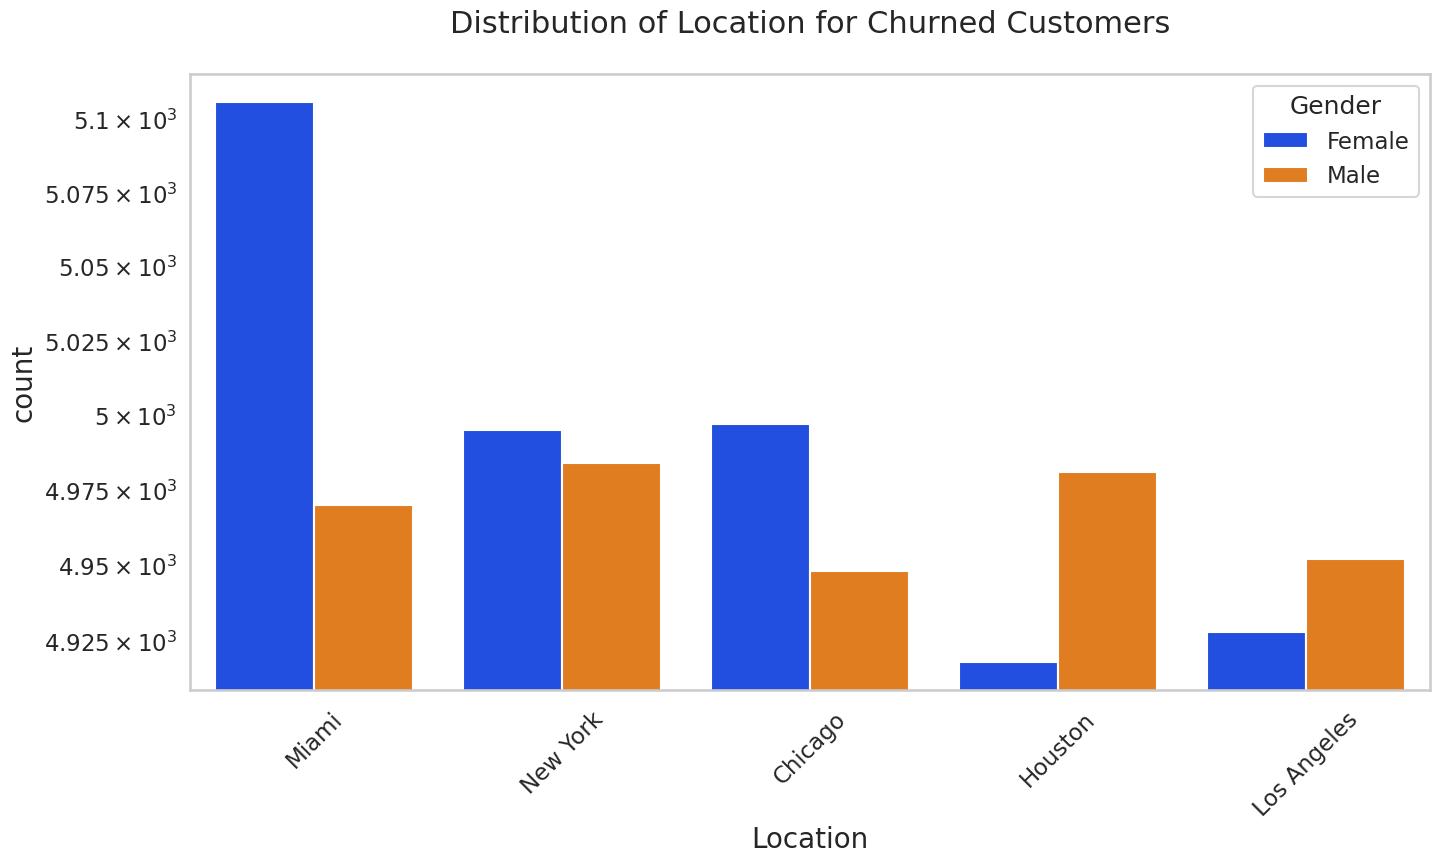

In [112]:
uniplot(df_target1,col='Location',title='Distribution of Location for Churned Customers',hue='Gender')

**Here we can see that the female customers from Los Angeles and male customers from Houston has got churned the least**

### **Train Test Split**

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
features=[feature for feature in data if feature!='Churn']

In [115]:
x= data[features]
y = data["Churn"]

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(67000, 6)
(67000,)
(33000, 6)
(33000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### **Feature Selection**

In [117]:
from sklearn.feature_selection import f_classif,SelectKBest
fs = SelectKBest(score_func=f_classif,k=3)
fs.fit(x_train, y_train)

SelectKBest(k=3)

In [118]:
fs.get_support()

array([ True, False,  True, False,  True, False])

In [119]:
selected_feat = x_train.columns[(fs.get_support())]
selected_feat

Index(['Age', 'Location', 'Monthly_Bill'], dtype='object')

In [120]:
import math
def list_ceil(x):
    return[math.ceil(i) for i in x]
print("P Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)

P Values :
[0.1944 0.7897 0.0214 0.7265 0.392  0.589 ]
F Values :
[1.68397026 0.07114018 5.29558409 0.12234231 0.73263151 0.2918399 ]


In [121]:
list_ceil(fs.scores_)

[2, 1, 6, 1, 1, 1]

In [122]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x_train.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)

feature_score.columns = ["Input_Features","Score","P Value"]
print(feature_score.nlargest(3,columns="Score"))

  Input_Features     Score  P Value
2       Location  5.295584   0.0214
0            Age  1.683970   0.1944
4   Monthly_Bill  0.732632   0.3920


In [123]:
print('Total features: {}'.format((x_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))

Total features: 6
Selected features: 3


In [124]:
data.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [125]:
selected_feat

Index(['Age', 'Location', 'Monthly_Bill'], dtype='object')

In [126]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]

In [127]:
x_train.head()

,Age,Location,Monthly_Bill
59428,45,0,31.67
34957,68,1,63.26
4264,28,2,53.31
53791,58,3,91.08
82114,56,1,53.19


In [128]:
y_train.head()

59428    1
34957    0
4264     1
53791    1
82114    1
Name: Churn, dtype: int64

### **Classifiers for cleaned dataset**

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error,r2_score,classification_report,confusion_matrix

def train_model(m,name):
    model = m
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"\n{name}")
    print(classification_report(y_test, predictions))

train_model(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model(RandomForestClassifier(random_state=3),"Random Forest Classifier")
train_model(XGBClassifier(n_estimators=600),"XGBoost Classifier")
train_model(GradientBoostingClassifier(random_state=1),"Gradient Classifier")
train_model(ExtraTreesClassifier(),"Extra Trees Classifier")
train_model(LogisticRegression(),"Logistic Regression")


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.50      0.50      0.50     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16638
           1       0.49      0.49      0.49     16362

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
we

**All the classifiers are giving 50%, so we try to find better way for model building**

### **Using SMOTEENN**

In [130]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [131]:
def train_model_Smoteenn(m,name):
    xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
    model_dt_smote = m
    model_dt_smote.fit(xr_train,yr_train)
    yr_predict = model_dt_smote.predict(xr_test)
    model_score_r = model_dt_smote.score(xr_test, yr_test)
    print(name)
    print(classification_report(yr_test, yr_predict))

In [132]:
train_model_Smoteenn(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model_Smoteenn(RandomForestClassifier(random_state=3),"Random Forest Classifier")
train_model_Smoteenn(XGBClassifier(n_estimators=600),"XGBoost Classifier")
train_model_Smoteenn(GradientBoostingClassifier(random_state=1),"Gradient Classifier")
train_model_Smoteenn(ExtraTreesClassifier(),"Extra Trees Classifier")
train_model_Smoteenn(LogisticRegression(),"Logistic Regression")

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       853
           1       0.82      0.82      0.82       857

    accuracy                           0.82      1710
   macro avg       0.82      0.82      0.82      1710
weighted avg       0.82      0.82      0.82      1710

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       857
           1       0.91      0.89      0.90       853

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       847
           1       0.81      0.80      0.80       863

    accuracy                           0.80      1710
   macro avg       0.80      0.80      0.80      1710
weigh

In [145]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote = ExtraTreesClassifier()
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       868
           1       0.89      0.91      0.90       842

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710



**By using SMOTEENN Extra Trees Classifier has provided 90% accuracy so I am chosing it as the final model**

In [134]:
print(confusion_matrix(yr_test, yr_predict))

[[778  74]
 [ 91 767]]


In [135]:
import pickle
filename = 'model.pkl'
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [136]:
load_model = pickle.load(open(filename, 'rb'))

model_score_r = load_model.score(xr_test, yr_test)

print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       852
           1       0.91      0.89      0.90       858

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710



### **Preprocessor Pipeline**

In [137]:
df_final[['Age','Location','Monthly_Bill','Churn']]

,Age,Location,Monthly_Bill,Churn
0,63,Los Angeles,73.36,0
1,62,New York,48.76,0
2,24,Los Angeles,85.47,0
3,36,Miami,97.94,1
4,46,Miami,58.14,0
...,...,...,...,...
99995,33,Houston,55.13,1
99996,62,New York,61.65,0
99997,64,Chicago,96.11,1
99998,51,New York,49.25,1


In [138]:
class CategoricalFeatureProcessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.labels_mappings = {}
        for feature in categorical_features:
            labels_ordered = X.groupby([feature])['Churn'].mean().sort_values().index
            self.labels_mappings[feature] = {label: index for index, label in enumerate(labels_ordered)}
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for feature in categorical_features:
            X_transformed[feature] = X_transformed[feature].map(self.labels_mappings[feature])
        return X_transformed

# Define categorical features
categorical_features = ['Location']

# Create a pipeline
pipeline = Pipeline([
    ('categorical_processor', CategoricalFeatureProcessor())
])

# Fit and transform the dataset using the pipeline
preprocessed_data = pipeline.fit_transform(df_final[['Age','Location','Monthly_Bill','Churn']])

In [139]:
data[['Age','Location','Monthly_Bill','Churn']]

,Age,Location,Monthly_Bill,Churn
0,63,1,73.36,0
1,62,4,48.76,0
2,24,1,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,0,55.13,1
99996,62,4,61.65,0
99997,64,2,96.11,1
99998,51,4,49.25,1


In [140]:
preprocessed_data

,Age,Location,Monthly_Bill,Churn
0,63,1,73.36,0
1,62,4,48.76,0
2,24,1,85.47,0
3,36,3,97.94,1
4,46,3,58.14,0
...,...,...,...,...
99995,33,0,55.13,1
99996,62,4,61.65,0
99997,64,2,96.11,1
99998,51,4,49.25,1


In [141]:
df1 = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(df1)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


In [142]:
df1= pd.DataFrame([[45, 'Chicago', 31.67,1 ]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = pipeline.transform(df1)

data_scaled[['Age', 'Location', 'Monthly_Bill']]

,Age,Location,Monthly_Bill
0,45,2,31.67


### **Saving the preprocessor**

In [143]:
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [144]:
load_Preprocessor = pickle.load(open('preprocessing_pipeline.pkl', 'rb'))

df1 = pd.DataFrame([[45, 'Chicago', 31.67, 0]], columns=['Age', 'Location', 'Monthly_Bill', 'Churn'])

data_scaled = load_Preprocessor.transform(df1)

data_scaled[['Age', 'Location', 'Monthly_Bill']]


,Age,Location,Monthly_Bill
0,45,2,31.67


### **ML Web App**